# **NLP Assignment (22l-7497)**

## Importing required libraries

In [2]:
import re
import nltk
import pandas as pd
import numpy as np
import plotly.express as px
from collections import Counter
from nltk.util import ngrams
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer

## Importing Dataset

In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("sachinkumar62/movies-details")


print("Path to dataset files:", path)

100%|██████████| 1.21M/1.21M [00:00<00:00, 46.6MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/sachinkumar62/movies-details/versions/1


In [4]:
import pandas as pd
df=pd.read_csv(path+"/movies.csv")


In [5]:
df.head()

,Unnamed: 0,id,title,overview,release_date,popularity,vote_average,vote_count
0,0,19404,Dilwale Dulhania Le Jayenge,"Raj is a rich, carefree, happy-go-lucky second...",1995-10-20,18.433,8.7,2763
1,1,724089,Gabriel's Inferno Part II,Professor Gabriel Emerson finally learns the t...,2020-07-31,8.439,8.7,1223
2,2,278,The Shawshank Redemption,Framed in the 1940s for the double murder of h...,1994-09-23,65.570,8.7,18637
3,3,238,The Godfather,"Spanning the years 1945 to 1955, a chronicle o...",1972-03-14,63.277,8.7,14052
4,4,761053,Gabriel's Inferno Part III,The final part of the film adaption of the ero...,2020-11-19,26.691,8.7,773


#  Task 1: Data preprocessing and Exploration

## Removing URl's and Special characters

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
def preprocess_text(text, use_stemming=True):

    if not isinstance(text, str):
        return []
    text = re.sub(r"http\S+|www\S+|https\S+", "", text, flags=re.MULTILINE)
    text = re.sub(r"[^a-zA-Z\s]", "", text)
    text = text.lower()
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    if use_stemming:
        stemmer = PorterStemmer()
        tokens = [stemmer.stem(word) for word in tokens]
    else:
        lemmatizer = WordNetLemmatizer()
        tokens = [lemmatizer.lemmatize(word) for word in tokens]

    return tokens

##  Creating new column to store preprocessed data

In [ ]:
df["processed_text"] = df['overview'].apply(preprocess_text)


In [ ]:
df.head()

,Unnamed: 0,id,title,overview,release_date,popularity,vote_average,vote_count,processed_text
0,0,19404,Dilwale Dulhania Le Jayenge,"Raj is a rich, carefree, happy-go-lucky second...",1995-10-20,18.433,8.7,2763,"[raj, rich, carefre, happygolucki, second, gen..."
1,1,724089,Gabriel's Inferno Part II,Professor Gabriel Emerson finally learns the t...,2020-07-31,8.439,8.7,1223,"[professor, gabriel, emerson, final, learn, tr..."
2,2,278,The Shawshank Redemption,Framed in the 1940s for the double murder of h...,1994-09-23,65.570,8.7,18637,"[frame, doubl, murder, wife, lover, upstand, b..."
3,3,238,The Godfather,"Spanning the years 1945 to 1955, a chronicle o...",1972-03-14,63.277,8.7,14052,"[span, year, chronicl, fiction, italianamerica..."
4,4,761053,Gabriel's Inferno Part III,The final part of the film adaption of the ero...,2020-11-19,26.691,8.7,773,"[final, part, film, adapt, erot, romanc, novel..."


In [ ]:
df.columns

Index(['Unnamed: 0', 'id', 'title', 'overview', 'release_date', 'popularity',
       'vote_average', 'vote_count', 'processed_text'],
      dtype='object')

## Checking the rows of dataset

In [ ]:
row_count = df.shape[0]
print(f"The dataset has {row_count} rows.")

The dataset has 8551 rows.


## Applying ngrams

In [ ]:
def get_ngram_freq(processed_texts, n=1, top_n=20):
    all_ngrams = []
    for tokens in processed_texts:
        all_ngrams.extend(ngrams(tokens, n))

    ngram_freq = Counter(all_ngrams).most_common(top_n)
    df_ngram = pd.DataFrame(ngram_freq, columns=['ngram', 'count'])
    df_ngram['ngram'] = df_ngram['ngram'].apply(lambda x: ' '.join(x))

    return df_ngram

In [ ]:
unigram_df = get_ngram_freq(df['processed_text'], n=1, top_n=20)
bigram_df = get_ngram_freq(df['processed_text'], n=2, top_n=20)
trigram_df = get_ngram_freq(df['processed_text'], n=3, top_n=20)

## Visualisation of all the ngrams

In [ ]:
fig1 = px.bar(unigram_df, x='ngram', y='count', title='Top 20 Unigrams or Top 20 words by frequency', text='count')
fig1.show()

In [ ]:
fig2 = px.bar(bigram_df, x='ngram', y='count', title='Top 20 Bigrams', text='count')
fig2.show()

In [ ]:
fig3 = px.bar(trigram_df, x='ngram', y='count', title='Top 20 Trigrams', text='count')
fig3.show()

## Word Cloud

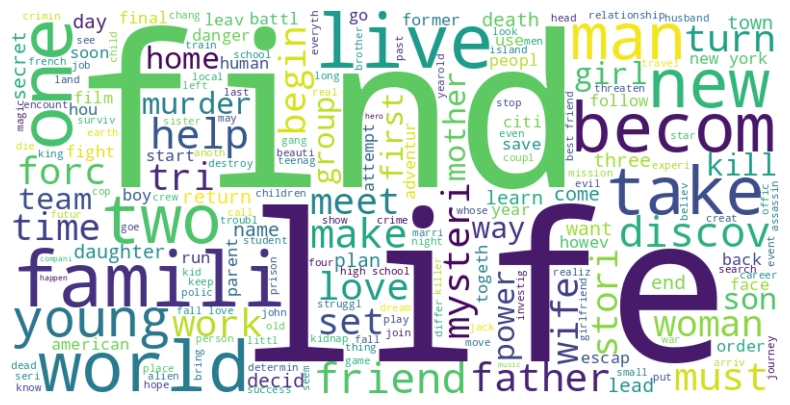

In [ ]:
all_words = [' '.join(tokens) for tokens in df['processed_text']]
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(all_words))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Task 2: Implementing TF-IDF Based Similarity

In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
df['processed_text_str'] = df['processed_text'].apply(lambda x: ' '.join(x))
vectorizer = TfidfVectorizer()

tfidf_matrix = vectorizer.fit_transform(df['processed_text_str'])


In [ ]:
def compute_tfidf_similarity(query, tfidf_matrix, vectorizer):
    query_tfidf = vectorizer.transform([query])

    similarity_scores = cosine_similarity(query_tfidf, tfidf_matrix).flatten()

    return similarity_scores


In [ ]:
query = "science fiction adventure"

df['tfidf_similarity'] = compute_tfidf_similarity(query, tfidf_matrix, vectorizer)


In [ ]:
top5_tfidf = df[['title', 'overview', 'tfidf_similarity']].sort_values(by='tfidf_similarity', ascending=False).head(5)

print("Top 5 Recommendations using TF-IDF:\n", top5_tfidf)

Top 5 Recommendations using TF-IDF:
                               title  \
5645               Megan Is Missing   
4648                 7 Days in Hell   
1991                           2046   
6032  David Brent: Life on the Road   
1901              American Splendor   

                                               overview  tfidf_similarity  
5645  Fictional drama based on actual events, about ...          0.355019  
4648  A fictional documentary-style expose on the ri...          0.309218  
1991  Women enter and exit a science fiction author'...          0.288319  
6032  A camera crew catches up with David Brent, the...          0.276717  
1901  An original mix of fiction and reality illumin...          0.271975  


In [ ]:
fig = px.bar(top5_tfidf, x='title', y='tfidf_similarity', title="Top 5 Recommendations (TF-IDF Similarity)",
             text='tfidf_similarity')

fig.show()


# Task 3: Implementing Word Embeddings for Similarity

In [ ]:
import gensim
from gensim.models import Word2Vec      # for this task it is required to use genism library

In [ ]:
sentences = df['processed_text'].tolist()

cbow_model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, sg=0)

skipgram_model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, sg=1)

In [ ]:
def get_document_embedding(model, words):
    word_vectors = [model.wv[word] for word in words if word in model.wv]
    return np.mean(word_vectors, axis=0) if word_vectors else np.zeros(model.vector_size)


df['cbow_embedding'] = df['processed_text'].apply(lambda x: get_document_embedding(cbow_model, x))
df['skipgram_embedding'] = df['processed_text'].apply(lambda x: get_document_embedding(skipgram_model, x))


In [ ]:
def get_query_embedding(query, model):
    query_tokens = query.lower().split()
    return get_document_embedding(model, query_tokens)

query = "science fiction adventure"

query_embedding_cbow = get_query_embedding(query, cbow_model)
query_embedding_skipgram = get_query_embedding(query, skipgram_model)


In [ ]:
def compute_cosine_similarity(query_embedding, doc_embeddings):
    similarities = cosine_similarity([query_embedding], np.vstack(doc_embeddings))
    return similarities[0]

df['cbow_similarity'] = compute_cosine_similarity(query_embedding_cbow, df['cbow_embedding'])
df['skipgram_similarity'] = compute_cosine_similarity(query_embedding_skipgram, df['skipgram_embedding'])


In [ ]:
top5_cbow = df[['title', 'overview', 'cbow_similarity']].sort_values(by='cbow_similarity', ascending=False).head(5)

top5_skipgram = df[['title', 'overview', 'skipgram_similarity']].sort_values(by='skipgram_similarity', ascending=False).head(5)

print("Top 5 Recommendations (CBOW):\n", top5_cbow)
print("\nTop 5 Recommendations (Skip-gram):\n", top5_skipgram)


Top 5 Recommendations (CBOW):
                                        title  \
224                          Rome, Open City   
8283                       The ABCs of Death   
4977                         Crush in Jaipur   
1411                    Deconstructing Harry   
2702  The Extraordinary Journey of the Fakir   

                                               overview  cbow_similarity  
224   A realistic portrayal of the underground resis...         0.999478  
8283  An ambitious anthology film featuring segments...         0.999441  
4977  A light hearted romantic-road comedy produced ...         0.999437  
1411  This film tells the story of a successful writ...         0.999437  
2702  The story of Ajatashatru Oghash Rathod, a faki...         0.999424  

Top 5 Recommendations (Skip-gram):
                    title                                           overview  \
7309                  Ex  Ex is a 2009 film directed and co-written by F...   
8456            Movie 43  A series 

# Task 4: Comparative Analysis

In [ ]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Bar(x=top5_cbow['title'], y=top5_cbow['cbow_similarity'], name="CBOW"))
fig.add_trace(go.Bar(x=top5_skipgram['title'], y=top5_skipgram['skipgram_similarity'], name="Skip-gram"))

fig.update_layout(title="Comparison of CBOW vs Skip-gram Recommendations",
                  xaxis_title="Movie Title",
                  yaxis_title="Cosine Similarity",
                  barmode="group")

fig.show()

In [ ]:
fig = go.Figure()
fig.add_trace(go.Bar(x=top5_tfidf['title'], y=top5_tfidf['tfidf_similarity'], name="TF-IDF"))
fig.add_trace(go.Bar(x=top5_cbow['title'], y=top5_cbow['cbow_similarity'], name="CBOW"))
fig.add_trace(go.Bar(x=top5_skipgram['title'], y=top5_skipgram['skipgram_similarity'], name="Skip-gram"))

fig.update_layout(title="Comparison of TF-IDF vs Word2Vec (CBOW & Skip-gram)",
                  xaxis_title="Movie Title",
                  yaxis_title="Cosine Similarity",
                  barmode="group")

fig.show()
